# Assignment 2 : Explainable Machine Learning : Feature Map Visqulization

In [66]:
# image_path = "data/bulbul.jpeg"
# image_path = "data/tiger.jpeg"
image_path = "data/cat.jpeg"

In [67]:
# TAsk 0 : Print pytorch version, GPU availability, number of GPUs

import torch
print("torch version: ", torch.__version__)
print("GPU available: ", torch.cuda.is_available())
print("Number of GPUs: ", torch.cuda.device_count())
# Torch vision version
import torchvision
print("torchvision version: ", torchvision.__version__)

# Update torch vision to v0.13 to support multiple weights for the same model
!pip install torchvision==0.13.0



torch version:  1.12.0+cu102
GPU available:  True
Number of GPUs:  1
torchvision version:  0.13.0+cu102


In [68]:
# Task1 : Load a pre-trained resenet50 classifier network

import torch
import torchvision.models as models
from torchvision.models import ResNet50_Weights

# Loading resnet50 model 
resnet50 = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
'''
# Print the model
print(resnet50)
# Print the model's state_dict
print(resnet50.state_dict())
'''



"\n# Print the model\nprint(resnet50)\n# Print the model's state_dict\nprint(resnet50.state_dict())\n"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PIL image size:  (900, 507)
Image tensor size:  torch.Size([3, 224, 224])


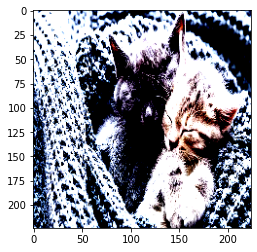

In [69]:
# Task2: Loading Imagenet1k Dataset and Preprocessing the data
from torchvision import datasets, transforms


'''
imagenet_1k = datasets.ImageNet("data/imagenet_1k", split = "val", download = True)
# This dataset is not available for download using torchvision.datasets.ImageNet
'''

# Loading an image of bulbul bird downloaded from google images
from PIL import Image
PIL_img = Image.open(image_path)
PIL_img.show()
print("PIL image size: ", PIL_img.size)

# Transforming the image to the format required by resnet50
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224)), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229,0.224,0.225])])
img_tensor = transform(PIL_img)
print("Image tensor size: ", img_tensor.size())
# Visualize the image tensor
import matplotlib.pyplot as plt
plt.imshow(img_tensor.permute(1, 2, 0)) # Permute the dimensions of the image tensor to match the format expected by matplotlib
plt.show()


Above, I didnt use [ResNet50-Weights.DEFAULT and weights.transform() for pre-processing the PIL image]


In [70]:
# Using standard way to preprocess the image
weights = ResNet50_Weights.IMAGENET1K_V2
preprocess = weights.transforms()

# Preprocess the image
preprocessed_img = preprocess(PIL_img)

In [71]:
# Task3: Model into evaluation mode
resnet50.eval()

# Task4: Run inference on the image
output = resnet50(preprocessed_img.unsqueeze(0)) # Unsqueeze the image tensor to add a batch dimension
print("Highest probability class: ", output.argmax().item())



Highest probability class:  281


Class 16 corresponds to bulbul bird : So this is a correct classification
Class 292 corresponds to Tiger : So this is a correct classification

In [72]:
# Task5: Displaying the layers - nodes 
from torchvision.models.feature_extraction import get_graph_node_names
print("layers of resnet50: \n", get_graph_node_names(resnet50))



layers of resnet50: 
 (['x', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.relu_1', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.0.add', 'layer1.0.relu_2', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.relu_1', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.add', 'layer1.1.relu_2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.relu', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.relu_1', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.add', 'layer1.2.relu_2', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.relu_1', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.add', 'layer2.0.relu_2', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.relu_1', 'layer2.1.conv3', 'layer2.1.bn3', 'layer

In [94]:
# Visualize the feature map
def visualize_feature_map(image, layer):
    # Get the feature map
    if image.size()[0] == 1:
        feature_map = layer(image)
    else:
        feature_map = layer(image.unsqueeze(0))
    # Visualize the feature map with 10 channels equally spaced from 0 to second dimension of conv1
    # Grid to 10 * 1
    # fig, axs = plt.subplots(1, 20, figsize=(25, 25))
    # for i in range(20):
    #     channel = int(feature_map.size()[1] / 20) * (i + 1)
    #     print("Visualizing channel: ", channel)
    #     axs[i].imshow(feature_map[0][channel].detach().numpy())
    # plt.show()

    # Grid 4*8
    fig, axs = plt.subplots(8, 8, figsize=(25, 15))
    for i in range(8):
        for j in range(8):
            channel = i * 8 + j
            axs[i, j].imshow(feature_map[0][channel].detach().numpy())
    plt.show()



Visualizing 10 channels for each layer in order: conv1, layer1, layer2, layer3, layer4
conv1 size:  torch.Size([1, 64, 112, 112])


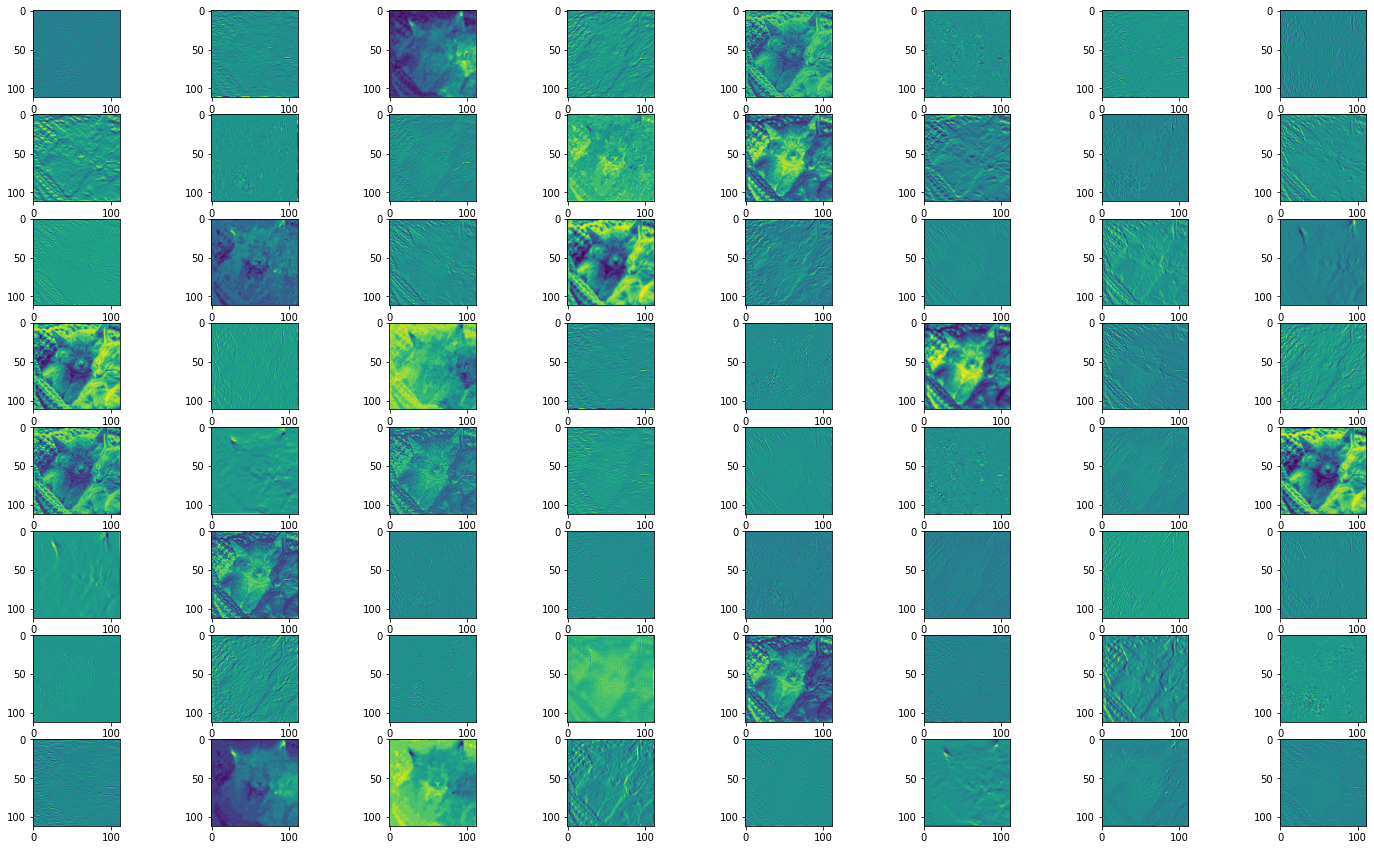

layer1 size:  torch.Size([1, 256, 112, 112])


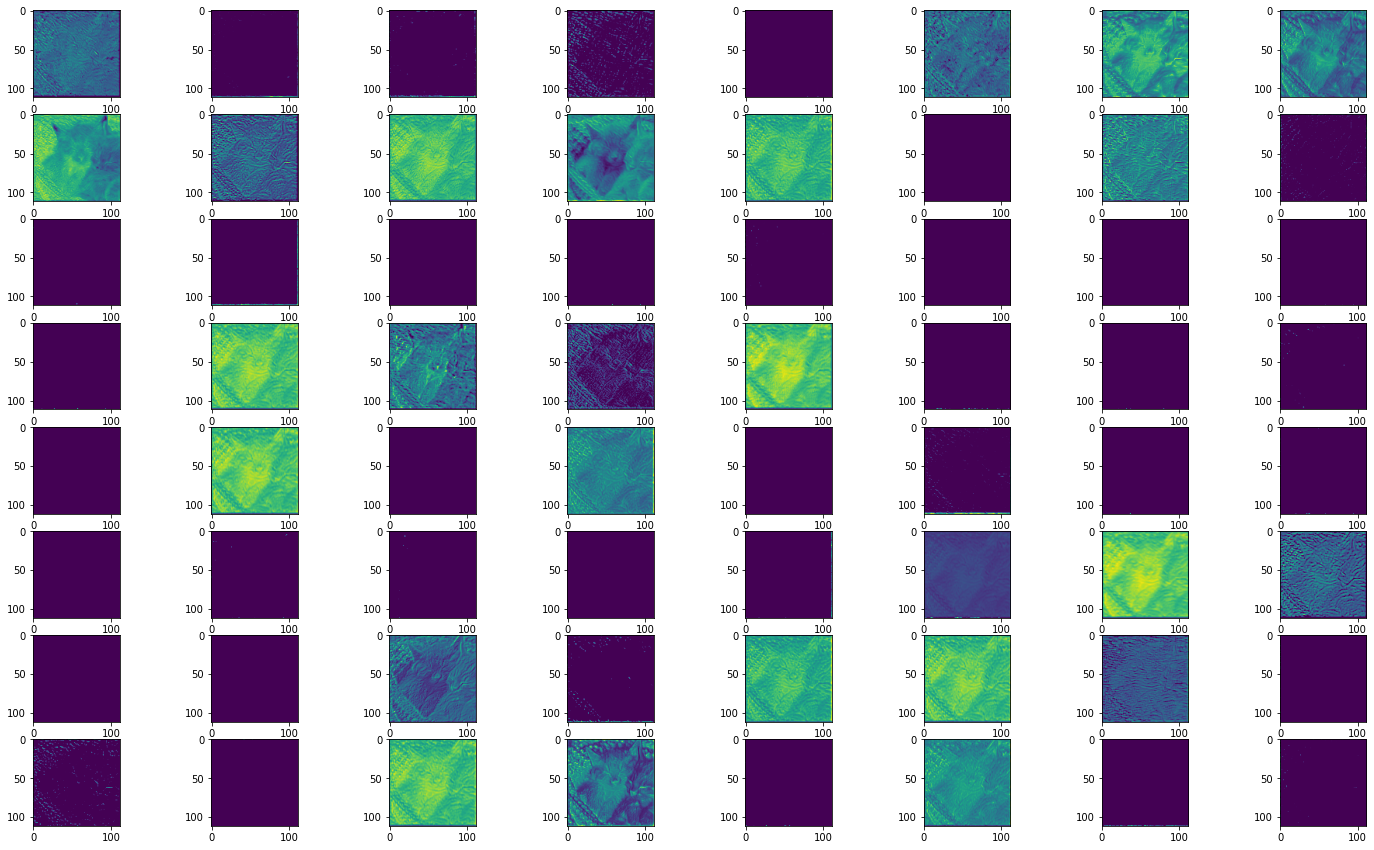

layer2 size:  torch.Size([1, 512, 56, 56])


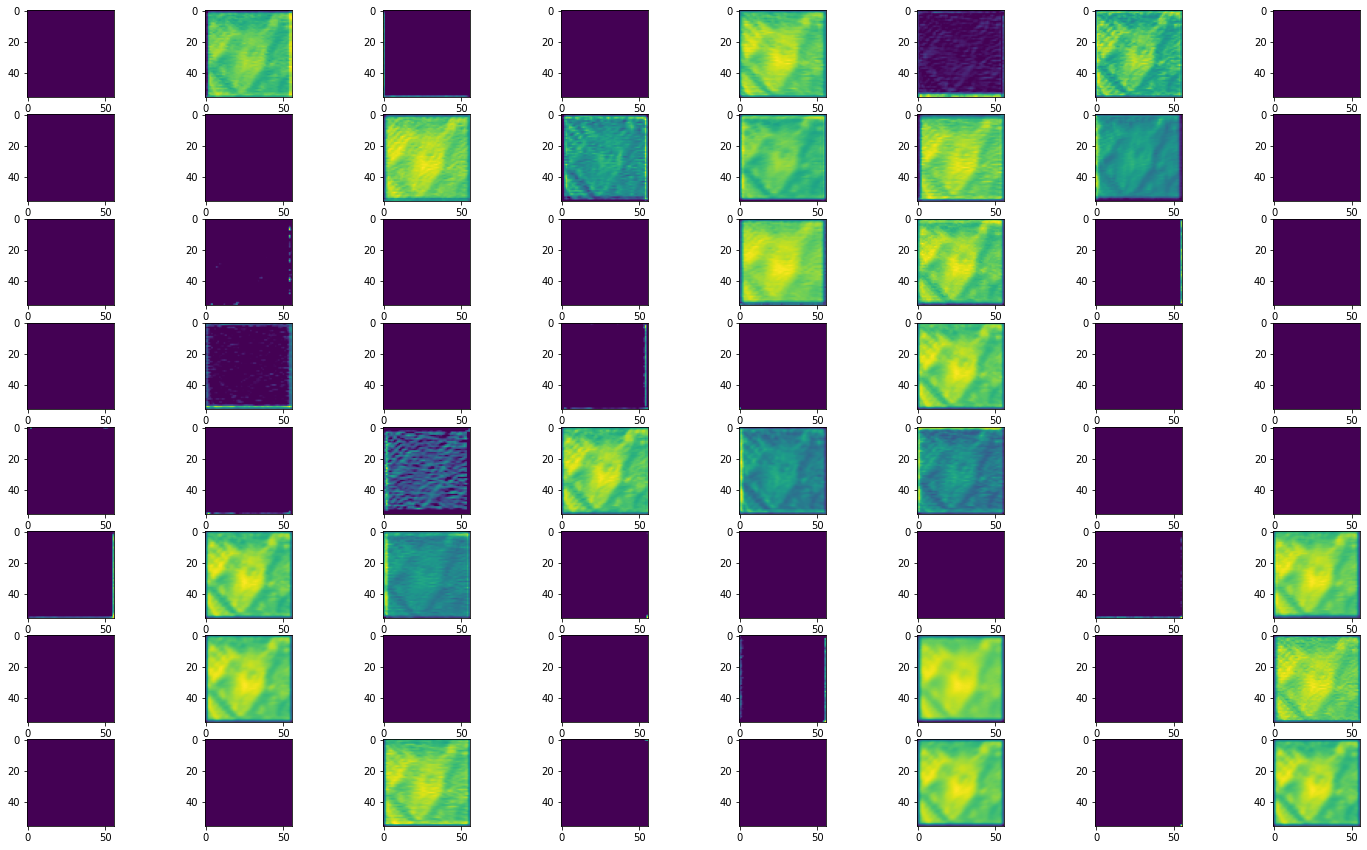

layer3 size:  torch.Size([1, 1024, 28, 28])


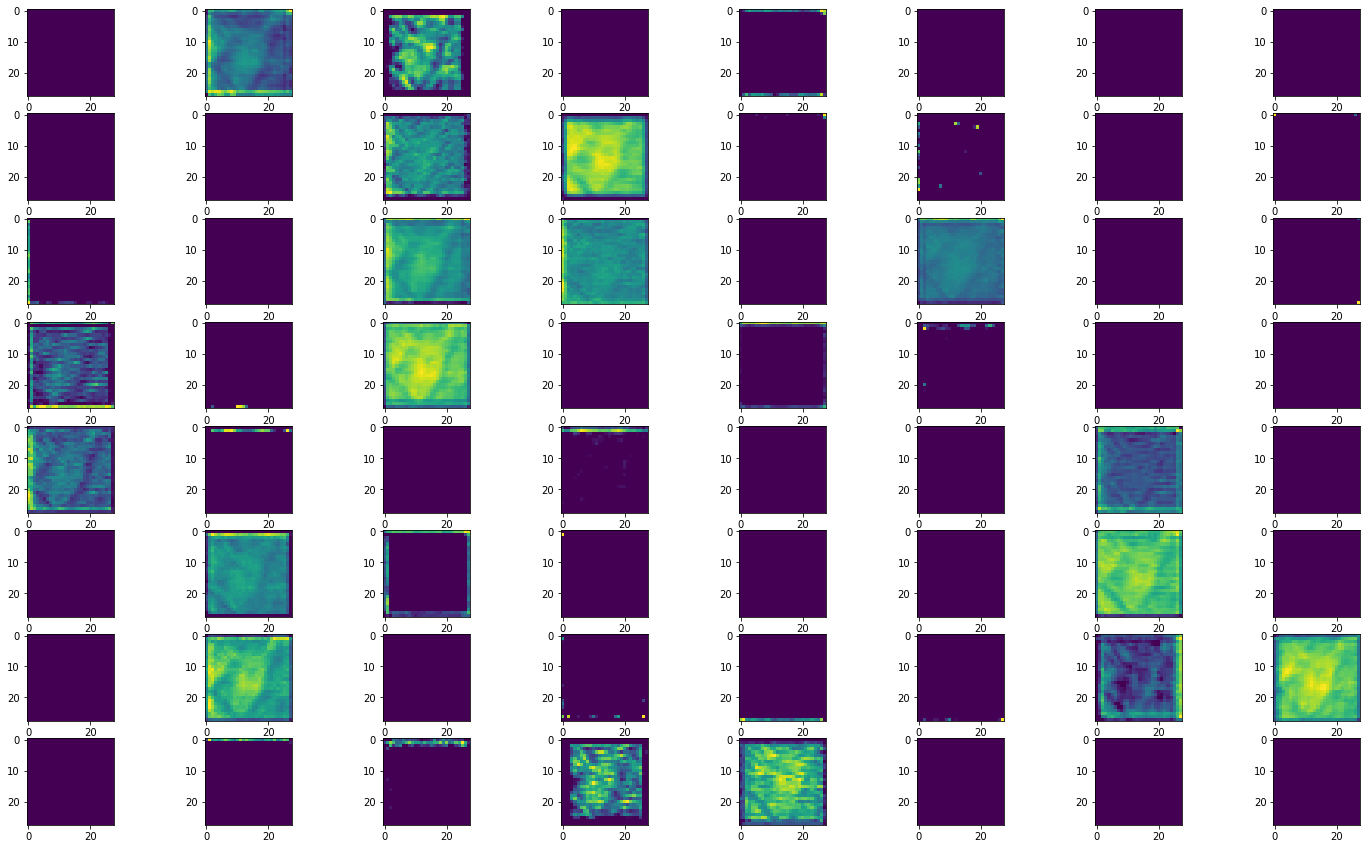

layer4 size:  torch.Size([1, 2048, 14, 14])


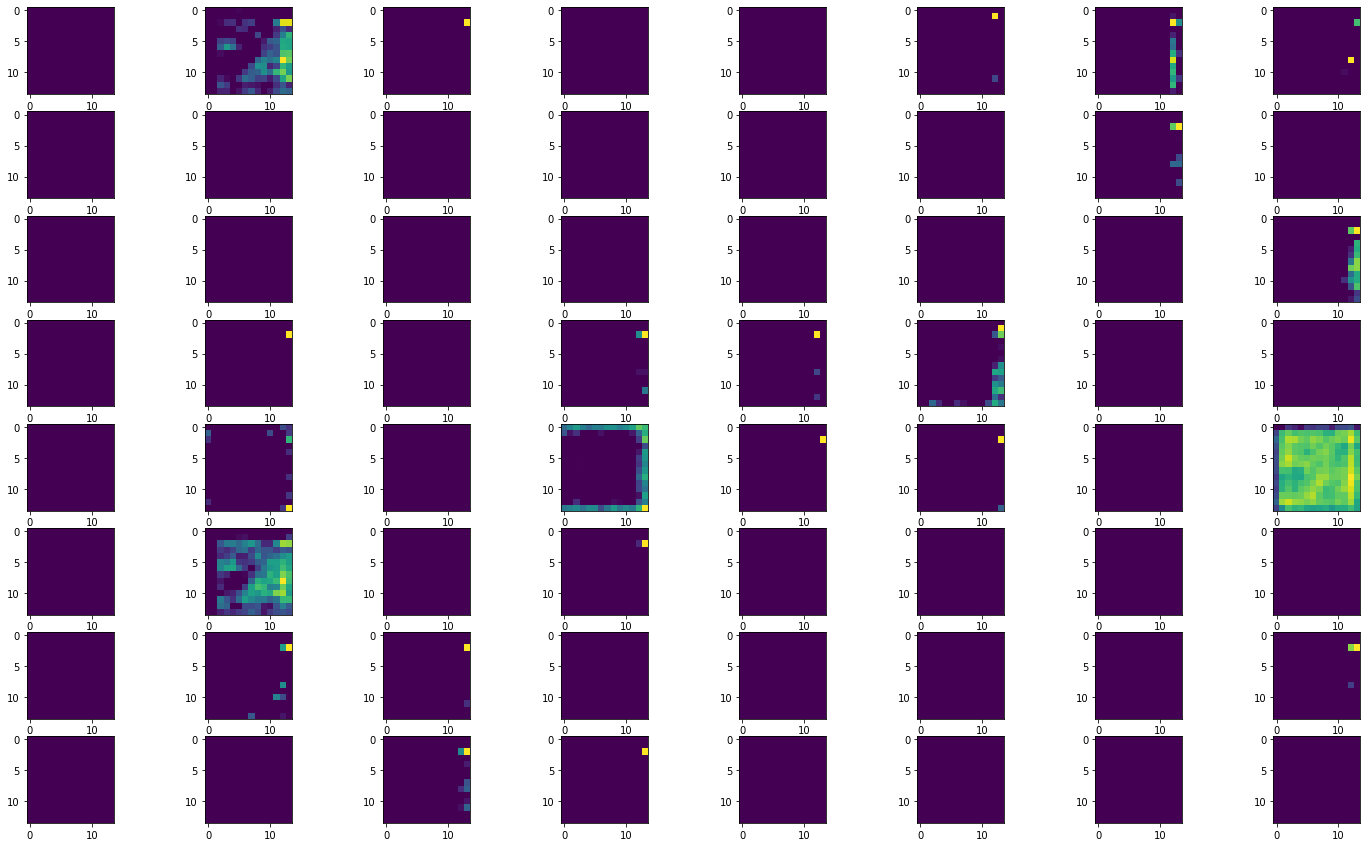

In [95]:
# Task6: Get the feature maps(Activations) of any three layers - and - visualize heatmap of a channel of the feature map

# Way 1: Using "get_graph_node_names" function

print("Visualizing 10 channels for each layer in order: conv1, layer1, layer2, layer3, layer4")
# Consider conv1 layer
conv1 = resnet50.conv1(preprocessed_img.unsqueeze(0))
print("conv1 size: ", conv1.size())
# Visualize the feature map
visualize_feature_map(preprocessed_img, resnet50.conv1)


# Consider layer1
layer1 = resnet50.layer1(conv1)
print("layer1 size: ", layer1.size())
# Visualize the feature map
visualize_feature_map(conv1, resnet50.layer1)

# Consider layer2
layer2 = resnet50.layer2(layer1)
print("layer2 size: ", layer2.size())
# Visualize the feature map
visualize_feature_map(layer1, resnet50.layer2)

# Consider layer3
layer3 = resnet50.layer3(layer2)
print("layer3 size: ", layer3.size())
# Visualize the feature map
visualize_feature_map(layer2, resnet50.layer3)


# Consider layer4
layer4 = resnet50.layer4(layer3)
print("layer4 size: ", layer4.size())
# Visualize the feature map
visualize_feature_map(layer3, resnet50.layer4)





In [96]:
# Task7: Describe the change in behavior of the filters going deeper in the network; 
# what are the main focus of shallow layers and deeper layers?

Observation and Analysis: 

So, as we go deeper into the layers of the network and visualized the activation maps, I noticed a change in the behavior of the filters. In the early or shallow layers, it was about low-level details – edges, corners, and basic textures. 

I could actually see clear patterns in the activation maps. But as we observe deeper layers, things got a bit tricky to understand. The filters seemed to be on a whole different level, focusing more on abstract (Not easily interpretable) and complex features. 

I couldn’t easily interpret what they were capturing. Some activation maps even looked empty, with just a couple of pixels active. 


Shallow Layers’ Main Focus: Early layers were all about those basic features – edges, corners, and textures. 
The activation maps showed clear and localized patterns, making it easy to connect them to specific parts of the input. 

Deep Layers’ Main Focus: Deeper layers shifted their focus to more abstract, class-specific features. It felt like the network was thinking in a more complex and global way, capturing high-level representations - I mean I can see higher activation values on the face of the cat here - not very obvious but atleast in some channels - yes. 

However, this made individual filters less interpretable, and some activation maps appeared sparse or even random. 


Overall, the network’s behavior evolved from simple and concrete in the shallow layers to complex and abstract in the deep layers. 
I couldn't clearly makeout why I can see many empty activation layers, but the output was correct for the few examples i tried. 
Empty activations signal - ineffectiveness of those channels in deciding the output atleast for a given class and example. I need more time with CNNs to understand the behaviours further.

This is all that I can understand for now!

Teams:

Shashank Dammalapati & Benoit 